## Import the needed Libraries

In [22]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

## Load MC simulation data
Data is stored in same folder as the nb.

In [2]:
### Open the files 
file_ee = uproot.open('ee.root')
ttree_name_ee = 'myTTree'

file_mm = uproot.open('mm.root')
ttree_name_mm = 'myTTree'

file_qq = uproot.open('qq.root')
ttree_name_qq = 'myTTree'

file_tt = uproot.open('tt.root')
ttree_name_tt = 'myTTree'

### Print list of 'branches' of the TTree (i.e. list of variable names)
print('list of parameters ee:')
print('ee',file_ee[ttree_name_ee].keys())
print()
print('mm', file_mm[ttree_name_mm].keys())
print()
print('qq', file_qq[ttree_name_qq].keys())
print()
print('tt', file_tt[ttree_name_tt].keys())
print('________________________________________')

## Load branches
branches_ee = file_ee[ttree_name_ee].arrays()
branches_mm = file_mm[ttree_name_mm].arrays()
branches_qq = file_qq[ttree_name_qq].arrays()
branches_tt = file_tt[ttree_name_tt].arrays()

## Define an numpy array for 'Pcharged' for the 4 channels
var_Pcharged = 'Pcharged'
pchar_ee = ak.to_numpy(branches_ee[var_Pcharged]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
pchar_mm = ak.to_numpy(branches_mm[var_Pcharged])
pchar_qq = ak.to_numpy(branches_qq[var_Pcharged])
pchar_tt = ak.to_numpy(branches_tt[var_Pcharged])


print(f"\n\nArrays of type '{type(pchar_ee)}' defined for '{var_Pcharged}':\n\nee {pchar_ee} min: {pchar_ee.min()}, max: {pchar_ee.max()}")
print(f'mm {pchar_mm} min: {pchar_mm.min()}, max: {pchar_mm.max()}')
print(f'qq {pchar_qq} min: {pchar_qq.min()}, max: {pchar_qq.max()}')
print(f'tt {pchar_tt} min: {pchar_tt.min()}, max: {pchar_tt.max()}')
print()

## Define an numpy array for 'Ncharged' for the 4 channels
var_Ncharged = 'Ncharged'
nchar_ee = ak.to_numpy(branches_ee[var_Ncharged]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
nchar_mm = ak.to_numpy(branches_mm[var_Ncharged])
nchar_qq = ak.to_numpy(branches_qq[var_Ncharged])
nchar_tt = ak.to_numpy(branches_tt[var_Ncharged])


print(f"\n\nArrays of type '{type(nchar_ee)}' defined for '{var_Ncharged}':\n")
print(f"ee {nchar_ee} min: {nchar_ee.min()}, max: {nchar_ee.max()}")
print(f'mm {nchar_mm} min: {nchar_mm.min()}, max: {nchar_mm.max()}')
print(f'qq {nchar_qq} min: {nchar_qq.min()}, max: {nchar_qq.max()}')
print(f'tt {nchar_tt} min: {nchar_tt.min()}, max: {nchar_tt.max()}')
print()

## Define an numpy array for 'E_ecal' for the 4 channels
var_E_ecal = 'E_ecal'
E_ecal_ee = ak.to_numpy(branches_ee[var_E_ecal]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_ecal_mm = ak.to_numpy(branches_mm[var_E_ecal])
E_ecal_qq = ak.to_numpy(branches_qq[var_E_ecal])
E_ecal_tt = ak.to_numpy(branches_tt[var_E_ecal])


print(f"\n\nArrays of type '{type(E_ecal_ee)}' defined for '{var_E_ecal}':\n")
print(f"ee {E_ecal_ee} min: {E_ecal_ee.min()}, max: {E_ecal_ee.max()}")
print(f'mm {E_ecal_mm} min: {E_ecal_mm.min()}, max: {E_ecal_mm.max()}')
print(f'qq {E_ecal_qq} min: {E_ecal_qq.min()}, max: {E_ecal_qq.max()}')
print(f'tt {E_ecal_tt} min: {E_ecal_tt.min()}, max: {E_ecal_tt.max()}')
print()

## Define an numpy array for 'E_hcal' for the 4 channels
var_E_hcal = 'E_hcal'
E_hcal_ee = ak.to_numpy(branches_ee[var_E_hcal]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_hcal_mm = ak.to_numpy(branches_mm[var_E_hcal])
E_hcal_qq = ak.to_numpy(branches_qq[var_E_hcal])
E_hcal_tt = ak.to_numpy(branches_tt[var_E_hcal])


print(f"\n\nArrays of type '{type(E_hcal_ee)}' defined for '{var_E_hcal}':\n")
print(f"ee {E_hcal_ee} min: {E_hcal_ee.min()}, max: {E_hcal_ee.max()}")
print(f'mm {E_hcal_mm} min: {E_hcal_mm.min()}, max: {E_hcal_mm.max()}')
print(f'qq {E_hcal_qq} min: {E_hcal_qq.min()}, max: {E_hcal_qq.max()}')
print(f'tt {E_hcal_tt} min: {E_hcal_tt.min()}, max: {E_hcal_tt.max()}')
print()

## Define an numpy array for 'cos_thet' for the 4 channels
var_cos_thet = 'cos_thet'
cos_thet_ee = ak.to_numpy(branches_ee[var_cos_thet]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
cos_thet_mm = ak.to_numpy(branches_mm[var_cos_thet])
cos_thet_qq = ak.to_numpy(branches_qq[var_cos_thet])
cos_thet_tt = ak.to_numpy(branches_tt[var_cos_thet])


print(f"\n\nArrays of type '{type(cos_thet_ee)}' defined for '{cos_thet_ee}':\n")
print(f"ee {cos_thet_ee} min: {cos_thet_ee.min()}, max: {cos_thet_ee.max()}")
print(f'mm {cos_thet_mm} min: {cos_thet_mm.min()}, max: {cos_thet_mm.max()}')
print(f'qq {cos_thet_qq} min: {cos_thet_qq.min()}, max: {cos_thet_qq.max()}')
print(f'tt {cos_thet_tt} min: {cos_thet_tt.min()}, max: {cos_thet_tt.max()}')
print()

## Define an numpy array for 'cos_thru' for the 4 channels
var_cos_thru = 'cos_thru'
cos_thru_ee = ak.to_numpy(branches_ee[var_cos_thru]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
cos_thru_mm = ak.to_numpy(branches_mm[var_cos_thru])
cos_thru_qq = ak.to_numpy(branches_qq[var_cos_thru])
cos_thru_tt = ak.to_numpy(branches_tt[var_cos_thru])


print(f"\n\nArrays of type '{type(cos_thru_ee)}' defined for '{cos_thet_ee}':\n")
print(f"ee {cos_thru_ee} min: {cos_thru_ee.min()}, max: {cos_thru_ee.max()}")
print(f'mm {cos_thru_mm} min: {cos_thru_mm.min()}, max: {cos_thru_mm.max()}')
print(f'qq {cos_thru_qq} min: {cos_thru_qq.min()}, max: {cos_thru_qq.max()}')
print(f'tt {cos_thru_tt} min: {cos_thru_tt.min()}, max: {cos_thru_tt.max()}')
print()

## Define an numpy array for 'E_lep' for the 4 channels
var_E_lep = 'E_lep'
E_lep_ee = ak.to_numpy(branches_ee[var_E_lep]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_lep_mm = ak.to_numpy(branches_mm[var_E_lep])
E_lep_qq = ak.to_numpy(branches_qq[var_E_lep])
E_lep_tt = ak.to_numpy(branches_tt[var_E_lep])


print(f"\n\nArrays of type '{type(cos_thru_ee)}' defined for '{cos_thet_ee}':\n")
print(f"ee {E_lep_ee} min: {E_lep_ee.min()}, max: {E_lep_ee.max()}")
print(f'mm {E_lep_mm} min: {E_lep_mm.min()}, max: {E_lep_mm.max()}')
print(f'qq {E_lep_qq} min: {E_lep_qq.min()}, max: {E_lep_qq.max()}')
print(f'tt {E_lep_tt} min: {E_lep_tt.min()}, max: {E_lep_tt.max()}')
print()

list of parameters ee:
ee ['run', 'event', 'Ncharged', 'Pcharged', 'E_ecal', 'E_hcal', 'E_lep', 'cos_thru', 'cos_thet']

mm ['run', 'event', 'Ncharged', 'Pcharged', 'E_ecal', 'E_hcal', 'E_lep', 'cos_thru', 'cos_thet']

qq ['run', 'event', 'Ncharged', 'Pcharged', 'E_ecal', 'E_hcal', 'E_lep', 'cos_thru', 'cos_thet']

tt ['run', 'event', 'Ncharged', 'Pcharged', 'E_ecal', 'E_hcal', 'E_lep', 'cos_thru', 'cos_thet']
________________________________________


Arrays of type '<class 'numpy.ndarray'>' defined for 'Pcharged':

ee [81.32794  71.334854  0.       ... 73.69003  81.64756  80.798645] min: 0.0, max: 55299.58984375
mm [63.769375 87.26109  89.692245 ... 87.108574 94.00878  88.81888 ] min: 0.0, max: 73101.0546875
qq [36.15152  62.90951  66.66082  ... 65.85204  56.341167 68.896835] min: 0.0, max: 45531.8671875
tt [25.156181 21.133148 59.023323 ... 33.127083 54.095062 17.629349] min: 0.0, max: 719342.8125



Arrays of type '<class 'numpy.ndarray'>' defined for 'Ncharged':

ee [2. 2. 0. ... 

## Plot the data to find where to cut

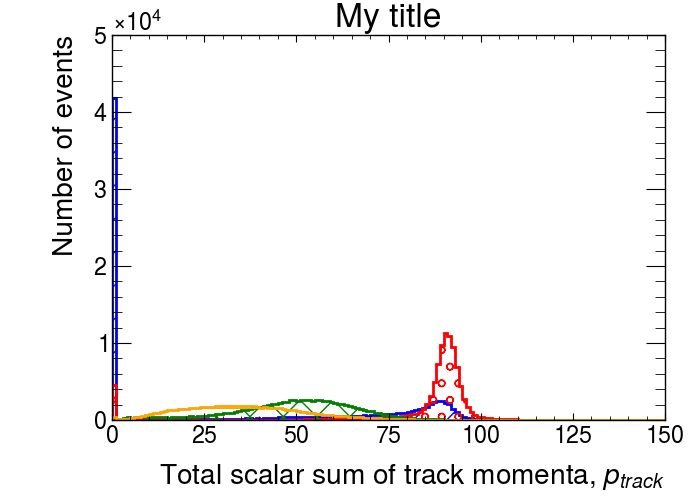

In [3]:
bins_pchar = np.linspace(0, 150, 151)

plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(pchar_ee,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(pchar_mm,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(pchar_qq,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(pchar_tt,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $p_{track}$')
plt.ylabel('Number of events')
plt.show()


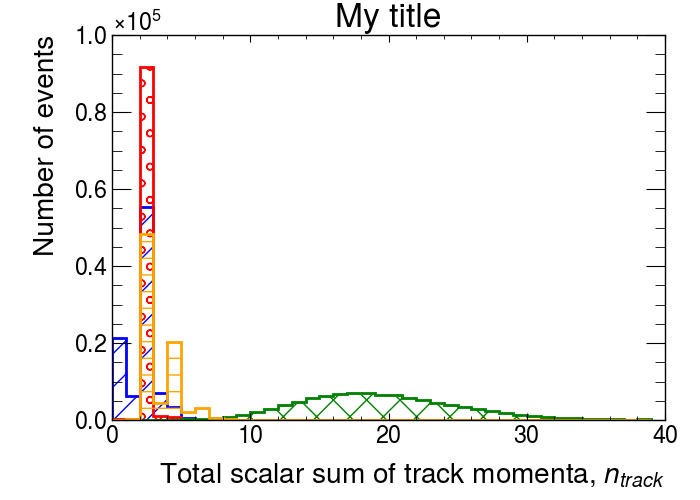

In [4]:

bins_nchar = np.linspace(0,39, 40)

plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))


bin_content_ee, bin_edges_ee, _ = plt.hist(nchar_ee,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(nchar_mm,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(nchar_qq,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(nchar_tt,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $n_{track}$')
plt.ylabel('Number of events')
plt.show()

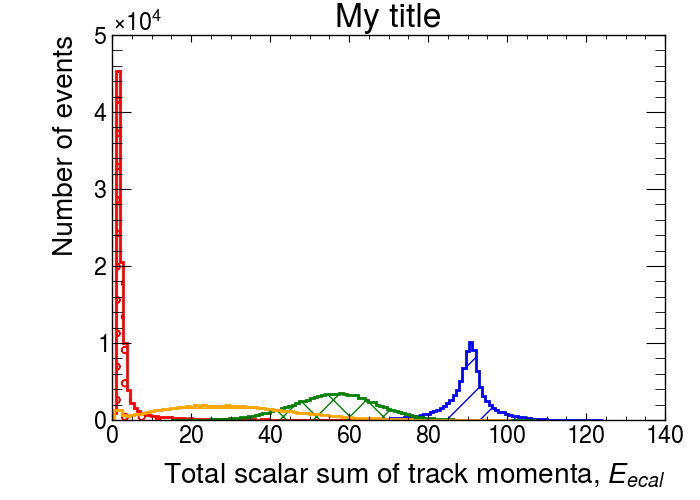

In [5]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(E_ecal_ee,bins=100, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(E_ecal_mm,bins=100, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(E_ecal_qq,bins=100, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(E_ecal_tt,bins=100, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $E_{ecal}$')
plt.ylabel('Number of events')
plt.show()

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.5, 'type': 'set_device_pixel_ratio'}


Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.5, 'type': 'set_device_pixel_ratio'}


Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.5, 'type': 'set_device_pixel_ratio'}


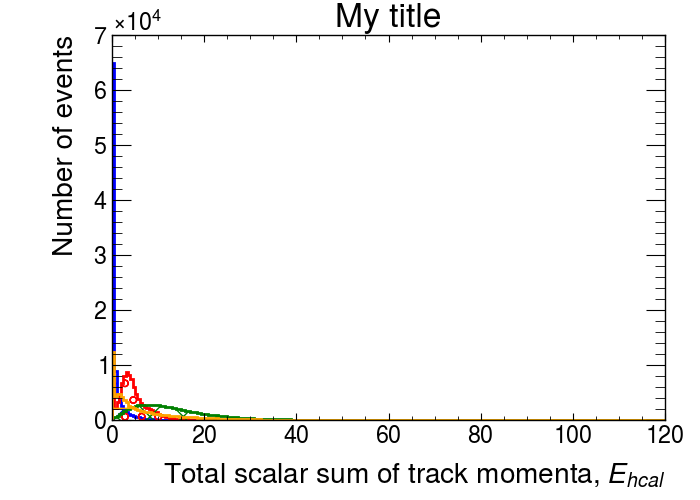

In [6]:
bins_Ehcal = np.linspace(0, 120, 242)


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(E_hcal_ee,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(E_hcal_mm,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(E_hcal_qq,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(E_hcal_tt,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $E_{hcal}$')
plt.ylabel('Number of events')
plt.show()

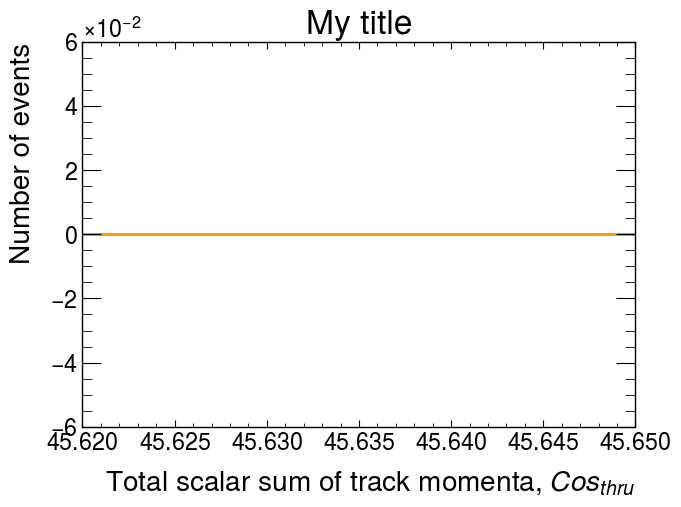

In [23]:
bins_cos_thru = np.linspace(0, 120, 242)


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

#bin_content_ee, bin_edges_ee, _ = plt.hist(cos_thru_ee,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
#mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(cos_thru_mm,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

#bin_content_qq, bin_edges_qq, _ = plt.hist(cos_thru_qq,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
#mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(cos_thru_tt,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $Cos_{thru}$')
plt.ylabel('Number of events')
plt.show()

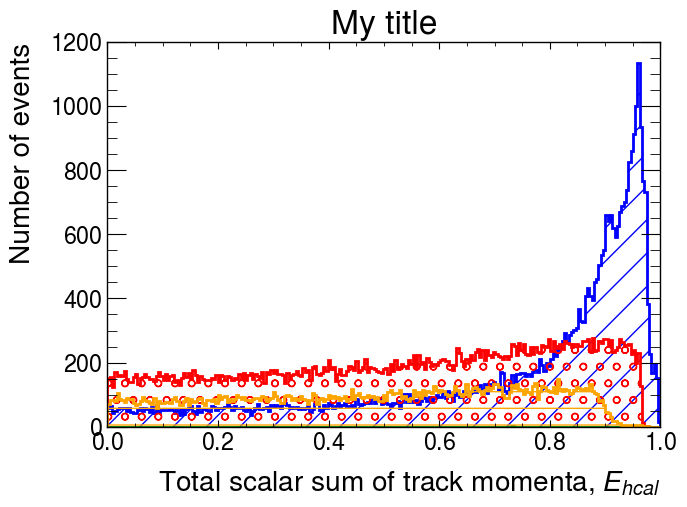

In [24]:
bins_Ehcal = np.linspace(0, 1, 242)


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(cos_thet_ee,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(cos_thet_mm,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(cos_thet_qq,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(cos_thet_tt,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $E_{hcal}$')
plt.ylabel('Number of events')
plt.show()

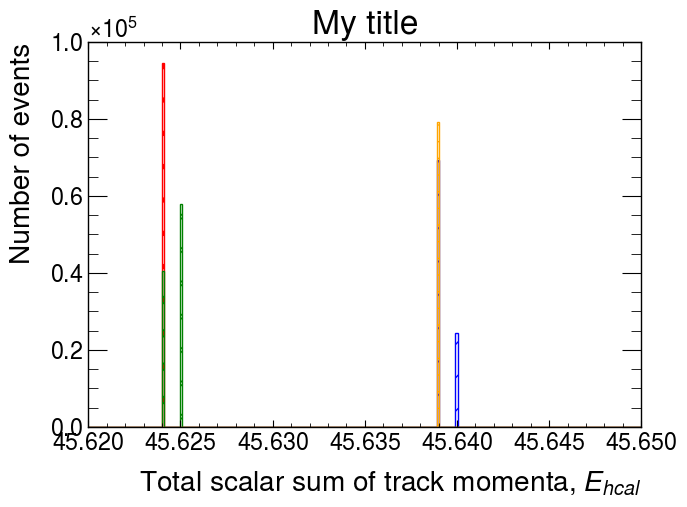

In [25]:
bins_Ehcal = np.linspace(45.62, 45.65, 242)


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(E_lep_ee,bins=bins_Ehcal, histtype='step',  linewidth=1, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(E_lep_mm,bins=bins_Ehcal, histtype='step',  linewidth=1, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(E_lep_qq,bins=bins_Ehcal, histtype='step',  linewidth=1, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(E_lep_tt,bins=bins_Ehcal, histtype='step',  linewidth=1, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $E_{hcal}$')
plt.ylabel('Number of events')
plt.show()

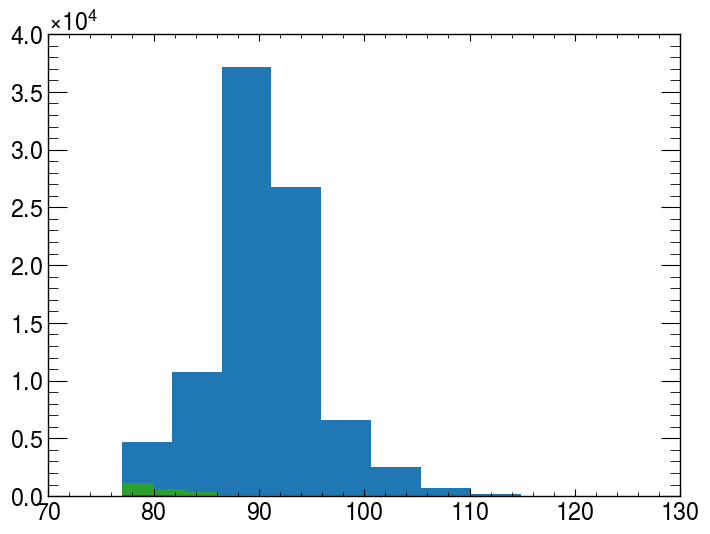

In [26]:

ee_mask_ee = E_ecal_ee >= 77 
ee_mask_mm = E_ecal_mm >= 77
ee_mask_qq = E_ecal_qq >= 77
ee_mask_tt = E_ecal_tt >= 77
#print(branches_mm['E_ecal'][ee_mask])
plt.hist(E_ecal_ee[ee_mask_ee])
plt.hist(E_ecal_mm[ee_mask_mm])
plt.hist(E_ecal_qq[ee_mask_qq])
plt.hist(E_ecal_tt[ee_mask_tt])
plt.show()

(0.0, 100.0)

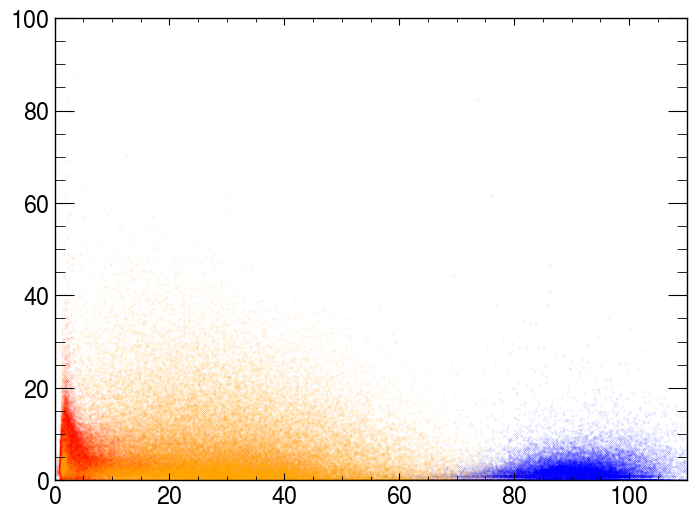

In [27]:
plt.plot(E_ecal_ee, E_hcal_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_ecal_mm, E_hcal_mm, '.', color= 'r', markersize=0.1)
#plt.plot(E_ecal_qq, E_hcal_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_ecal_tt, E_hcal_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,110)
plt.ylim(0,100)

(0.0, 120.0)

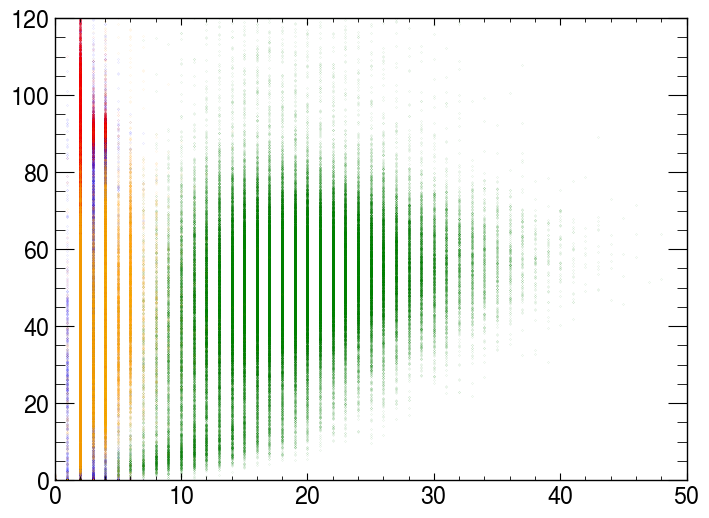

In [28]:
plt.plot(nchar_ee, pchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(nchar_mm, pchar_mm, '.', color= 'r', markersize=0.1)
plt.plot(nchar_qq, pchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(nchar_tt, pchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,50)
plt.ylim(0,120)

(0.0, 140.0)

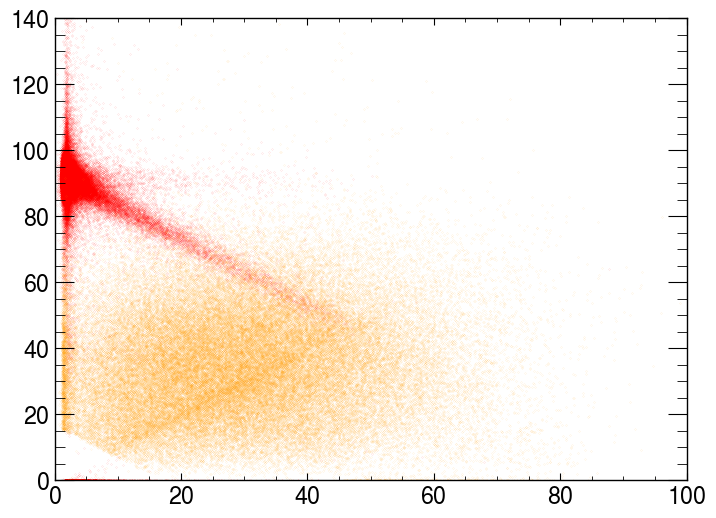

In [29]:
#plt.plot(E_ecal_ee, pchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_ecal_mm, pchar_mm, '.', color= 'r', markersize=0.1)
#plt.plot(E_ecal_qq, pchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_ecal_tt, pchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,100)
plt.ylim(0,140)

(0.0, 150.0)

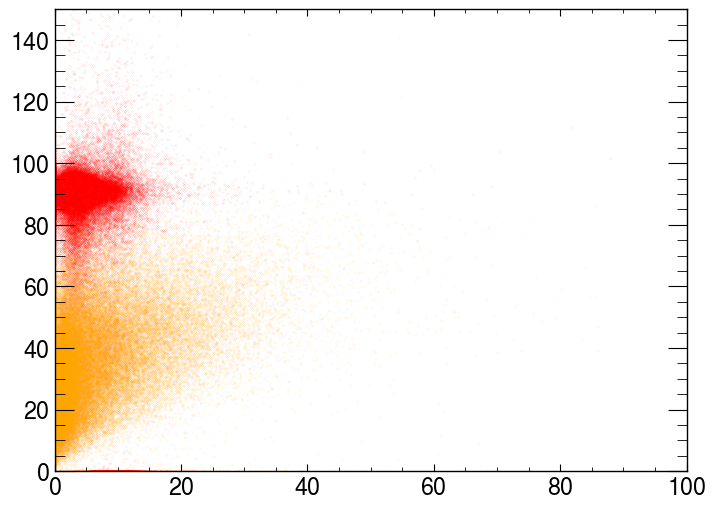

In [30]:
#plt.plot(E_hcal_ee, pchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_hcal_mm, pchar_mm, '.', color= 'r', markersize=0.1)
#plt.plot(E_hcal_qq, pchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_hcal_tt, pchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,100)
plt.ylim(0,150)

(0.0, 50.0)

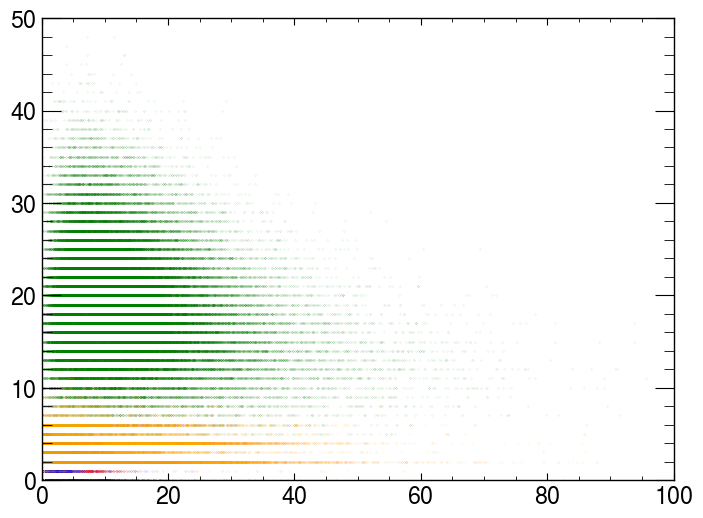

In [31]:
plt.plot(E_hcal_ee, nchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_hcal_mm, nchar_mm, '.', color= 'r', markersize=0.1)
plt.plot(E_hcal_qq, nchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_hcal_tt, nchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,100)
plt.ylim(0,50)

(0.0, 50.0)

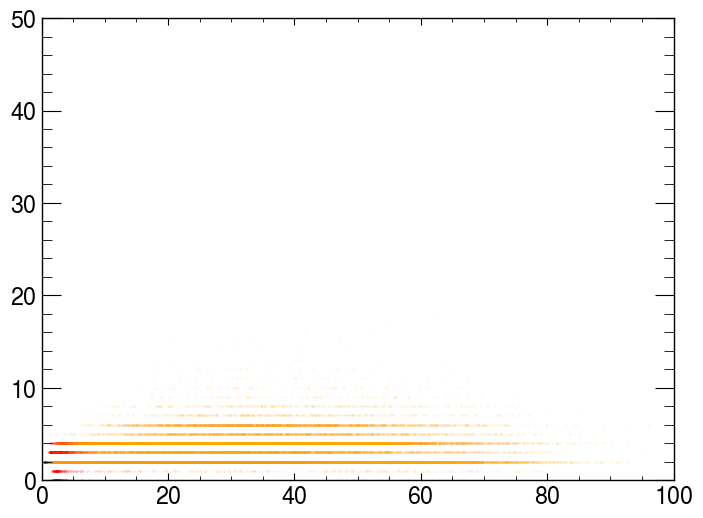

In [32]:
#plt.plot(E_ecal_ee, nchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_ecal_mm, nchar_mm, '.', color= 'r', markersize=0.1)
#plt.plot(E_ecal_qq, nchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_ecal_tt, nchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,100)
plt.ylim(0,50)

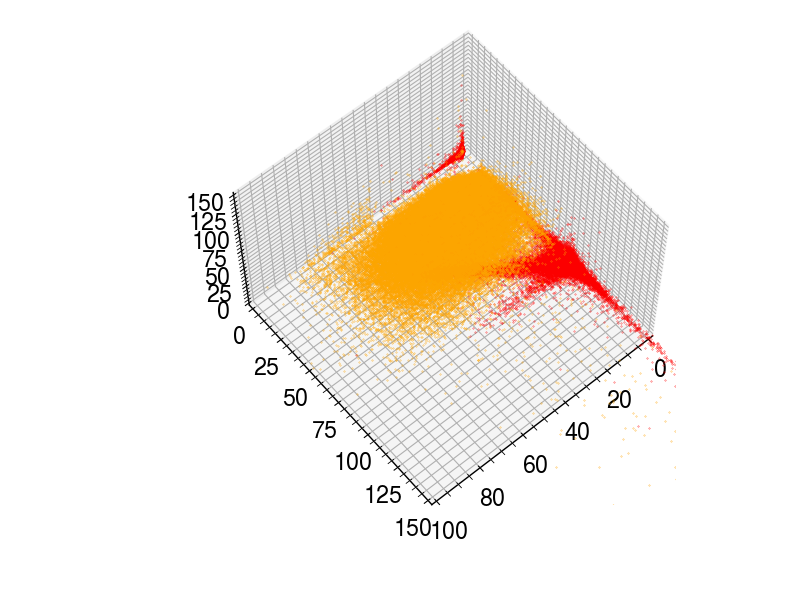

In [17]:
ax = plt.figure().add_subplot(projection='3d')
#ax.plot(E_ecal_ee, nchar_ee, E_hcal_ee, '.', color= 'b', markersize=0.1)
ax.plot(E_ecal_mm, pchar_mm, E_hcal_mm, '.', color= 'r', markersize=0.5)
#ax.plot(E_ecal_qq, nchar_qq, E_hcal_qq, '.', color= 'green', markersize=0.5)
ax.plot(E_ecal_tt, pchar_tt, E_hcal_tt, '.', color= 'orange', markersize=0.5)
ax.set_xlim(0, 100)
ax.set_ylim(0, 150)
ax.set_zlim(0, 150)
ax.view_init(elev=60., azim=50)

## Introduce particle identification system
Array with number of events qual to number of entrances 

Entrances are:
* not calssified = 'xx'
* electron = 'ee' 
* myon = 'mm' 
* hadron = 'qq' 
* tau = 'tt' 


In [18]:
def classify_event_in_4CH(Ncharged, Pcharged, E_ecal, E_hcal):
    if len(Ncharged)==len(Pcharged)==len(E_ecal)==len(E_hcal):
        PI = np.chararray((len(Ncharged),1), itemsize=2)[:]
        PI[:] = 'xx'      # create start PI array with all events unclassified
        NC = 0      
        ee = 0      
        qq = 0
        mm = 0
        tt = 0                 
        for i in range(len(Ncharged)):
            #print(Ncharged[i])
            if Ncharged[i] >= 7:
                PI[i] = 'qq'
                qq += 1
            elif E_ecal[i] >= 60:
                PI[i] = 'ee'
                ee += 1
            elif (70<=Pcharged[i] <= 110) & (E_ecal[i] < 20):
                PI[i] = 'mm'
                mm += 1
            elif (Pcharged[i] < 10) & (E_ecal[i] < 10):
                PI[i] = 'mm'
                mm += 1
            elif (E_ecal[i] < 100) & (1 < Pcharged[i] < 75):
                PI[i] = 'tt'
                tt += 1
            else:
                NC += 1

        #print(PI)
        #print(len(Ncharged),NC, ee, qq, mm, tt)
    else:
        print('Unequaly long input arrays')
    return [[ee, mm, qq, tt, len(Ncharged), NC], PI]



In [19]:
classify_ee = classify_event_in_4CH(nchar_ee, pchar_ee, E_ecal_ee, E_hcal_ee)
classify_mm = classify_event_in_4CH(nchar_mm, pchar_mm, E_ecal_mm, E_hcal_mm)
classify_qq = classify_event_in_4CH(nchar_qq, pchar_qq, E_ecal_qq, E_hcal_qq)
classify_tt = classify_event_in_4CH(nchar_tt, pchar_tt, E_ecal_tt, E_hcal_tt)
efficiency_matrix = [[np.round(classify_ee[0][i]/ classify_ee[0][4],4) for i in range(4)],
                     [np.round(classify_mm[0][i]/ classify_mm[0][4],4) for i in range(4)],
                     [np.round(classify_qq[0][i]/ classify_qq[0][4],4) for i in range(4)],
                     [np.round(classify_tt[0][i]/ classify_tt[0][4],4) for i in range(4)]]

In [20]:
efficiency_matrix

[[0.9941, 0.0, 0.0003, 0.0011],
 [0.0, 0.9477, 0.0, 0.0343],
 [0.001, 0.0, 0.9947, 0.0041],
 [0.0403, 0.0077, 0.0123, 0.9254]]

In [21]:
Test = np.arange(0,10)
id = np.zeros(10)
